In [29]:
# ----- IMPORTACION DE LIBRERIAS -----
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import math

In [30]:
# ----- NOMBRE DE LAS IMAGENES DE PRUEBA -----
foto1 = "carretera.jpg"
foto2 = "image-cell.png"
foto3 = "person_bacteria.jpeg"



# https://www.ripublication.com/ijaerdoi/2015/ijaerv10n9_20.pdf
# https://www.researchgate.net/profile/Can-Eyupoglu/publication/315751159_Implementation_of_Bernsen's_Locally_Adaptive_Binarization_Method_for_Gray_Scale_Images/links/58e20d33aca272059ab08e6c/Implementation-of-Bernsens-Locally-Adaptive-Binarization-Method-for-Gray-Scale-Images.pdf
# https://es.slideshare.net/JorgeAntonioParraSerquen/segmentacin-por-umbralizacin-mtodo-de-otsu

# Umbralizacion global

# Umbralización global por el método de Otsu

Otsu:  371.3079559675479


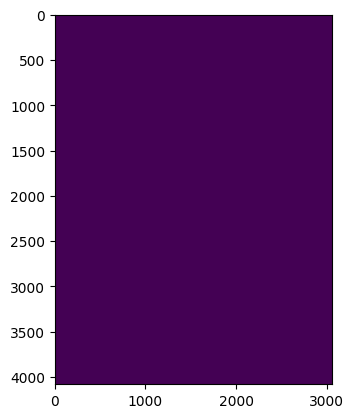

In [31]:
def umbralizacionOtsu(nombreImg):
     #Se lee la imagen
     imagen = cv2.imread(nombreImg,cv2.IMREAD_GRAYSCALE)

     filas, columnas = imagen.shape
     tamaño  = imagen.size
     #tamaño = 16
     matriz = np.asarray(imagen)
     # matriz = np.array([[0,0,1,1],
     #                    [1,2,2,3],
     #                    [4,4,5,5],
     #                    [5,6,7,7]])
     #filas,columnas = 4,4

     histograma = np.zeros(256, dtype=int)

     # Calcular el histograma manualmente
     for x in range(filas):
          for y in range(columnas):
               valor_pixel = imagen[x, y]
               histograma[valor_pixel] += 1
     Wbg = 0
     Wfg = 0
     Xbg = 0
     Xfg = 0
     media_general = 0
     Vbg = 0
     Vfg = 0
     val1 = []
     val2 = []

     # calcula la media y el promedio de la aparicion
     for x in range(filas):
          for y in range(columnas):
               if(matriz[x,y] > 130):
                    Wbg += 1
                    Xbg += matriz[x,y]
                    val1.append(matriz[x,y])
               else:
                    Wfg += 1
                    Xfg += matriz[x,y]
                    val2.append(matriz[x,y])

          media_general += matriz[x,y]

     # print(arreglo)
     Xbg /= Wbg
     Xfg /= Wfg

     Wbg /= tamaño
     Wfg /= tamaño

     Vbg = np.var(val1)
     Vfg = np.var(val2)

     otsu = Wbg*Vbg + Wfg*Vfg

     print("Otsu: ", otsu)


     for x in range(filas):
          for y in range(columnas):
               if(matriz[x,y] > otsu/255):
                    matriz[x,y] = 255
               else:
                    matriz[x,y] = 0
     
     imagen2 = Image.fromarray(matriz)
     plt.imshow(imagen2) 
     # demostracion de que es correcto
 
umbralizacionOtsu(foto1)

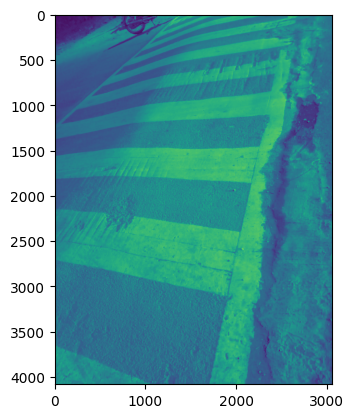

In [32]:
imagen = cv2.imread(foto1,cv2.IMREAD_GRAYSCALE)
plt.imshow(imagen)

Otsu:  120


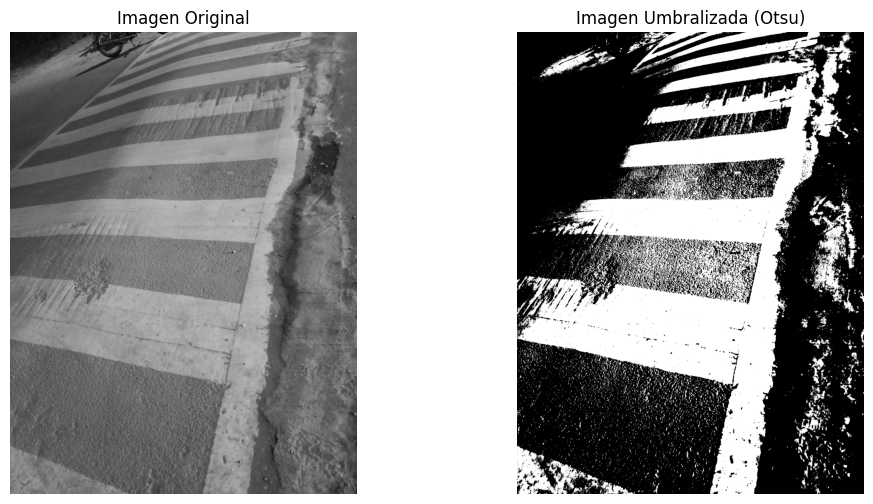

In [33]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def umbralizacionOtsu(imagen):
    # Paso 1: Calcular el histograma
    histograma = np.zeros(256)
    filas, columnas = imagen.shape

    # Realiza el histograma de la imagen
    for x in range(filas):
        for y in range(columnas):
            intensidad = imagen[x, y]
            histograma[intensidad] += 1

    # Paso 2: Normalizar el histograma
    histograma = histograma / (filas * columnas)

    
    var_max = 0
    umbral_optimo = 0


    # proceso para encontrar el umbral óptimo
    for umbral in range(1, 256):
        # Calcular w1, w2
        w1 = np.sum(histograma[:umbral])    # suma de 0 al umbral
        w2 = np.sum(histograma[umbral:])    # suma del umbral al final

        if w1 == 0 or w2 == 0:
            continue

        # Calcular media1, media2
        media1 = np.sum(np.arange(umbral) * histograma[:umbral]) / w1
        media2 = np.sum(np.arange(umbral, 256) * histograma[umbral:]) / w2

        #Calcular varianza entre clases
        var_between = w1 * w2 * ((media1 - media2) ** 2)

        if var_between > var_max:
            var_max = var_between
            umbral_optimo = umbral

    # Paso 5: Aplicar el umbral óptimo
    imagen_binaria = (imagen > umbral_optimo) * 255

    print("Otsu: ", umbral_optimo)

    return imagen_binaria


# ----- LLAMADO DE LAS FUNCIONES -----
imagen = cv2.imread(foto1, 0)   # lee la imagen en escala de grises

otsu = umbralizacionOtsu(imagen)  # guarda la imagen que resulta de ostu

imgOtsu = Image.fromarray(otsu)    # pasa el arreglo a imagen

# Muestra la imagen original y la imagen umbralizada
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(imagen, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(imgOtsu, cmap='gray')
plt.title('Imagen Umbralizada (Otsu)')
plt.axis('off')

plt.show()


# Umbralización local adaptativa por el método de Bernsen

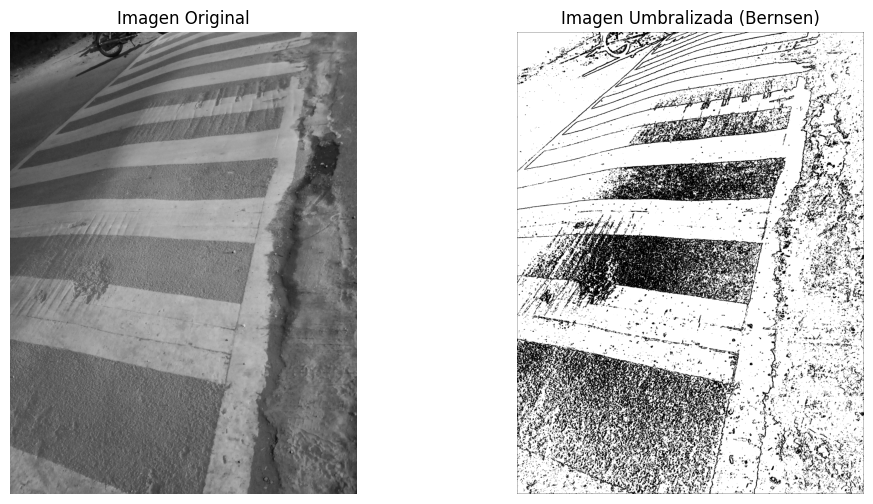

In [35]:
def umbralizacion_bernsen(imagen, kernel, umbral):
    filas, columnas = imagen.shape  
    resultado = np.zeros_like(imagen)   # hace una matriz de 0 del tamaño de la imagen

    ventana_radius = kernel // 2    # hace una division con un resultado entero

    for x in range(ventana_radius, filas - ventana_radius):
        for y in range(ventana_radius, columnas - ventana_radius):
            ventana = imagen[x - ventana_radius:x + ventana_radius + 1,
                             y - ventana_radius:y + ventana_radius + 1]
            min_pixel = np.min(ventana)
            max_pixel = np.max(ventana)

            if max_pixel - min_pixel <= umbral:
                resultado[x, y] = 255
            else:
                resultado[x, y] = 0

    return resultado

# Cargar una imagen en escala de grises (reemplaza con tu imagen)

imagen = Image.open(foto1).convert("L")
imagen = np.array(imagen)

# Aplicar umbralización de Bernsen
kernel = 20 # Tamaño de la ventana de vecindario
umbral = 20  # Umbral de contraste mínimo
imagen_umbralizada = umbralizacion_bernsen(imagen, kernel, umbral)

# Mostrar la imagen original y la imagen umbralizada
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(imagen, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(imagen_umbralizada, cmap='gray')
plt.title('Imagen Umbralizada (Bernsen)')
plt.axis('off')

plt.show()